# Question 2
- 1) Extract reviews of any product from ecommerce website like amazon
- 2) Perform emotion mining

In [2]:
!pip install tweepy
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

     |████████████████████████████████| 94 kB 712 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 903 kB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.


ModuleNotFoundError: No module named 'selenium'

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Connecting to Amazon and download reviews

In [8]:
iphone_reviews=[]

In [9]:
for i in range (1,31):
    ip=[]
    url ="https://www.amazon.in/Apple-iPhone-13-128GB-Blue/product-reviews/B09G9BL5CP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

## Downloading review from Amazon.in for the phone I Phone 13 

In [10]:
iphone_reviews = list(set(iphone_reviews))

In [11]:
txt_upd = ' '.join(iphone_reviews)

In [12]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [13]:
text_tokens = word_tokenize(txt_upd)

In [14]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

###  Creating the DATAFRAME 

In [15]:
tf = TfidfVectorizer()

In [16]:
text_tf = tf.fit_transform(tokens_without_sw)

In [17]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
df

,able,adapter,afford,ahead,amazon,android,angle,annoying,anything,apple,...,waste,wasted,wide,worth,would,write,writing,xdxdxdxdxd,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
word_list = ' '.join(df)

In [20]:
wordcloud = WordCloud(background_color='white',
                      width=1800,
                      height=1400).generate(word_list)

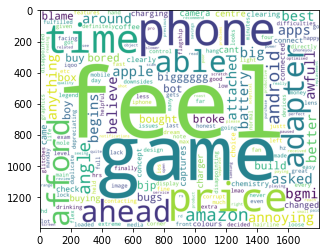

In [21]:
plt.imshow(wordcloud)

## Sentimental Analysis

In [22]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [23]:
positive_words = positive_words[35:]

In [24]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [25]:
negative_words = negative_words[35:]

In [26]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [27]:
wordcloud_neg = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [28]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [29]:
wordcloud_pos = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## __4 Conclusion__ 

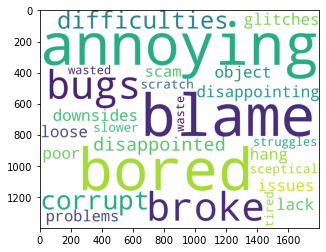

In [30]:
plt.imshow(wordcloud_neg)

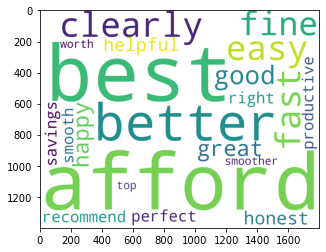

In [31]:
plt.imshow(wordcloud_pos)